In [1]:
# import the libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import klib as kb


In [3]:
df = pd.read_csv('./TV_Sales.csv')
df

,TV,Sales
0,16.0,54.732757
1,13.0,46.677897
2,41.0,150.177829
3,83.0,298.246340
4,15.0,56.594181
...,...,...
4567,26.0,94.685866
4568,71.0,249.101915
4569,44.0,163.631457
4570,71.0,253.610411


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      4562 non-null   float64
 1   Sales   4566 non-null   float64
dtypes: float64(2)
memory usage: 71.6 KB


In [5]:
df.isnull().sum()

TV       10
Sales     6
dtype: int64

In [6]:
df.isnull().sum()*100

TV       1000
Sales     600
dtype: int64

In [7]:
df.describe()

,TV,Sales
count,4562.000000,4566.000000
mean,54.066857,192.466602
std,26.125054,93.133092
min,10.000000,31.199409
25%,32.000000,112.322882
50%,53.000000,189.231172
75%,77.000000,272.507922
max,100.000000,364.079751


In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

TV       0
Sales    0
dtype: int64

In [10]:
df

,TV,Sales
0,16.0,54.732757
1,13.0,46.677897
2,41.0,150.177829
3,83.0,298.246340
4,15.0,56.594181
...,...,...
4567,26.0,94.685866
4568,71.0,249.101915
4569,44.0,163.631457
4570,71.0,253.610411


In [11]:
df.duplicated().sum()

0

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

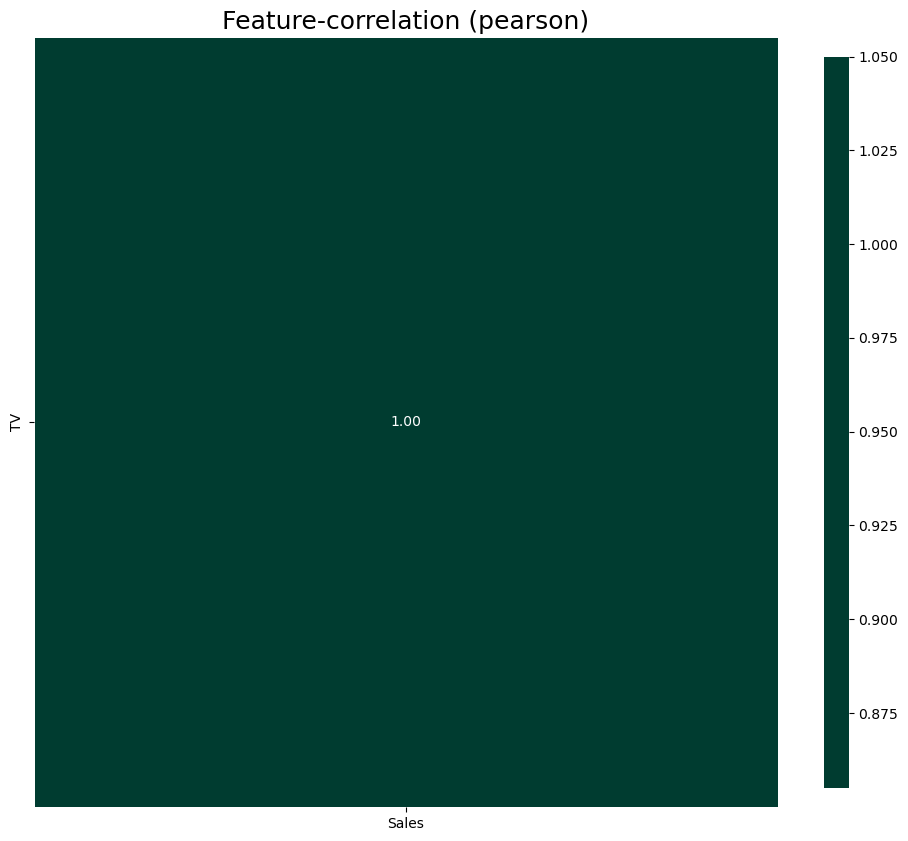

In [12]:
## check the correlation plot
kb.corr_plot(data=df,target='Sales')

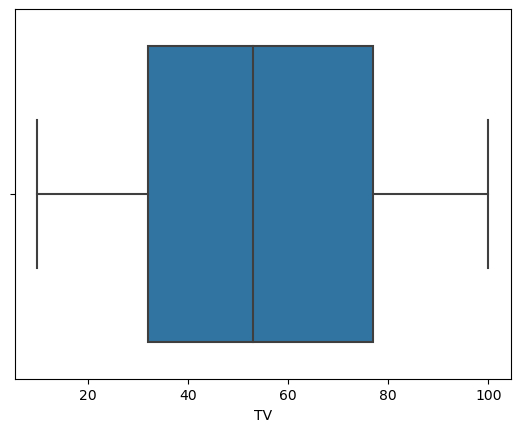

In [13]:
sns.boxplot(x='TV',data=df) ##creat the boxplot of tv(x)
plt.show() ## show the the picture of plot


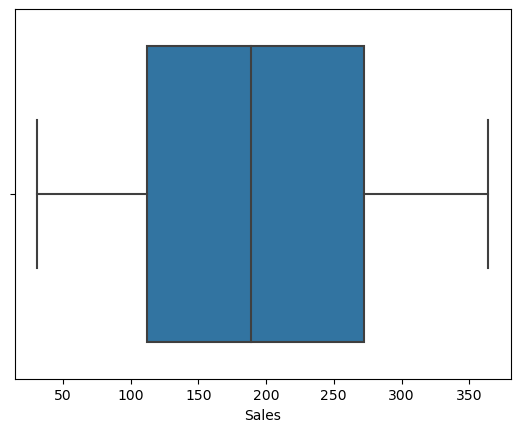

In [14]:
sns.boxplot(x='Sales',data=df) ## sales boxplot 
plt.show()

## Slecting the features, here only one column

In [15]:
x=df[['TV']].values ## check the value of the tv
x

array([[16.],
       [13.],
       [41.],
       ...,
       [44.],
       [71.],
       [42.]])

## selecting the target column

In [16]:
y=df[['Sales']].values
y

array([[ 54.73275715],
       [ 46.67789698],
       [150.1778288 ],
       ...,
       [163.6314574 ],
       [253.6104113 ],
       [148.2024141 ]])

In [17]:
## the value of x is 
sc=StandardScaler() ## to assign sc to standardscaler()


In [18]:
x=sc.fit_transform(x)

In [19]:
x

array([[-1.45775911],
       [-1.57263965],
       [-0.50042125],
       ...,
       [-0.38554071],
       [ 0.64838417],
       [-0.46212774]])

### splitting into training and testing data

In [21]:
x_train , x_test, y_train , y_test= train_test_split(x,y, test_size=0.2,random_state=0)

In [23]:
## model building
model = LinearRegression()

In [24]:
## fitting the model
model.fit(x_train,y_train)

LinearRegression()

In [25]:
##coefficient
model.coef_

array([[92.9890112]])

In [29]:
## training score
training_score = model.score(x_train,y_train)*100

In [31]:
training_score

99.89945329945171

In [26]:
##training accuracy
testing_score = model.score(x_test,y_test)*100


In [27]:
testing_score

99.89974160292293

In [32]:
## R2 score
R2_score = r2_score(y_test, model.predict(x_test))*100
R2_score

99.89974160292293

In [33]:
## Mean Absolute error
mae = mean_absolute_error(y_test,model.predict(x_test))
mae

2.363243117039462

In [34]:
## mean squared error
mse = mean_squared_error(y_test,model.predict(x_test))
mse

8.610468010474161

In [36]:
## predicting the values
y_pred = model.predict(x)
y_pred

array([[ 56.87703178],
       [ 46.19440377],
       [145.89893187],
       ...,
       [156.58155988],
       [252.72521198],
       [149.45980788]])

In [37]:
## creating the data of predicted and actual
OUTPUT = pd.DataFrame(zip(y,y_pred),columns = ("ACTUAL","PREDICTED"), dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,54.732757,56.877032
1,46.677897,46.194404
2,150.177829,145.898932
3,298.246340,295.455724
4,56.594181,53.316156


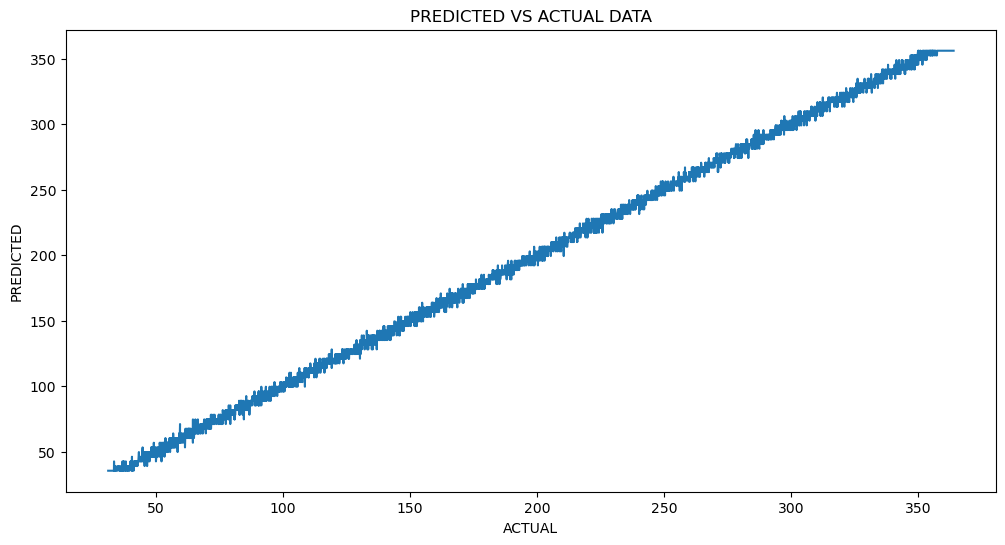

In [38]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
sns.lineplot(data=OUTPUT, x="ACTUAL", y= "PREDICTED");

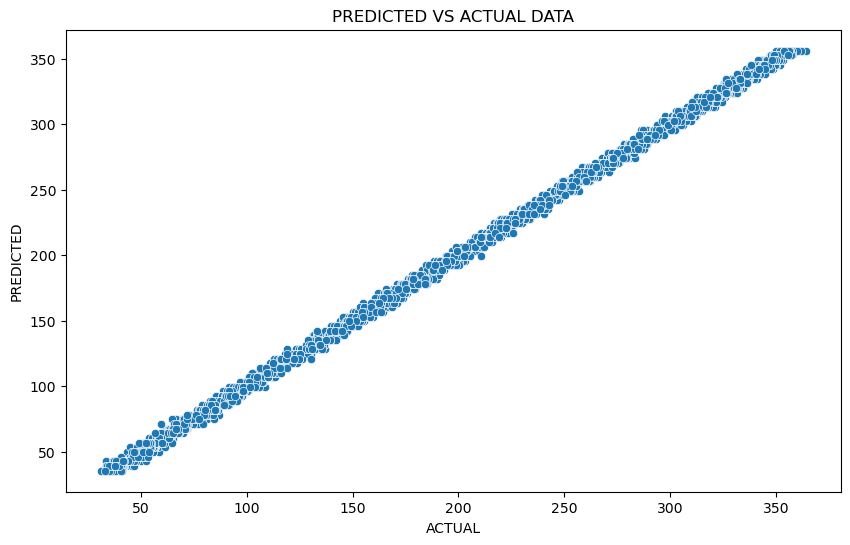

In [43]:
plt.figure(figsize=(10,6))
plt.title("PREDICTED VS ACTUAL DATA")
plt.xticks()
sns.scatterplot(data=OUTPUT, x="ACTUAL", y= "PREDICTED");